## Examen Final - Simulación Computacional 2019-II

## 1.
Si $x_0=137$ y
$$x_n = (15x_{n-1}+3) \mod 21$$

**a)** encuentre $x_1,...,x_{100}$

In [4]:
def ciclos(lista):
    xf=0
    xi=0
    for i in range(len(lista)):
        for j in range(i+1, len(lista)):
            if lista[i]==lista[j]:
                return str(j-i)
    return "No se repite"

def congruencialMixto(x0, a, mod, c, limit):
    xn = x0
    list = []
    print("cont\t Xn\t Un\t")
    for i in range(limit):
        xn = (a * xn + c) % mod
        un = xn / mod
        list.append(un)
        print('{}\t {}\t {}\t'.format(i+1,xn,un))
    return list

    
x0 = 137
a = 15
mod = 21
c = 3
limit = 100
lista = congruencialMixto(x0, a, mod, c, limit)


cont	 Xn	 Un	
1	 0	 0.0	
2	 3	 0.14285714285714285	
3	 6	 0.2857142857142857	
4	 9	 0.42857142857142855	
5	 12	 0.5714285714285714	
6	 15	 0.7142857142857143	
7	 18	 0.8571428571428571	
8	 0	 0.0	
9	 3	 0.14285714285714285	
10	 6	 0.2857142857142857	
11	 9	 0.42857142857142855	
12	 12	 0.5714285714285714	
13	 15	 0.7142857142857143	
14	 18	 0.8571428571428571	
15	 0	 0.0	
16	 3	 0.14285714285714285	
17	 6	 0.2857142857142857	
18	 9	 0.42857142857142855	
19	 12	 0.5714285714285714	
20	 15	 0.7142857142857143	
21	 18	 0.8571428571428571	
22	 0	 0.0	
23	 3	 0.14285714285714285	
24	 6	 0.2857142857142857	
25	 9	 0.42857142857142855	
26	 12	 0.5714285714285714	
27	 15	 0.7142857142857143	
28	 18	 0.8571428571428571	
29	 0	 0.0	
30	 3	 0.14285714285714285	
31	 6	 0.2857142857142857	
32	 9	 0.42857142857142855	
33	 12	 0.5714285714285714	
34	 15	 0.7142857142857143	
35	 18	 0.8571428571428571	
36	 0	 0.0	
37	 3	 0.14285714285714285	
38	 6	 0.2857142857142857	
39	 9	 0.42857142857142855	
40	 1

**b)** el tamaño del ciclo (si lo tiene)

In [3]:
print("total ciclos")
ciclos(lista)

total ciclos


'7'

**c)** calcule el estadístico $\chi^2$

## 2.
Dados los siguientes valores de la distribución de probabilidad discreta de la variable aleatoria $X$ de un dado de 12 lados: $X = {1,2,3,4,5,6,7,8,9,10,11,12}$, $p(X) = {0.06,0.05,0.05,0.04,0.02,0.02,0.05,0.07,0.2,0.25,0.1,0.09}$, ¿Qué valores retornaría el generador de variables aleatorias por el método de la inversión si los números aleatorios generados son: $U = {0.6996, 0.0318, 0.6344, 0.1708, 0.6865, 0.1573, 0.9454, 0.8211, 0.9102, 0.2579}$?

In [6]:
import random

      
def dist_acumulada(px):
    i = 0
    px_acu=[]
    for i in range(len(px)):
        if i == 0:
            px_acu.append(px[i])
        else:
            px_acu.append(px[i] + px_acu[i - 1])
    return px_acu

def transformada_inversa():
    x=[1,2,3,4,5,6,7,8,9,10,11,12]
    px=[0.06,0.05,0.05,0.04,0.02,0.02,0.05,0.07,0.2,0.25,0.1,0.09]
    numeros_aleatorios = [0.6996,0.0318,0.6344,0.1708,0.6865,0.1573,0.9454,0.8211,0.9102,0.2579]
    aleatorias = []
    px_acu=dist_acumulada(px)
    i = j= 0
    
    for i in range(len(numeros_aleatorios)):
        for j in range(len(px)):
            if numeros_aleatorios[i] < px_acu[j]:
                aleatorias.append(x[j])
                break
            
    i = 0
   
    print("n\t numero\t variable")
    print ("*****************************")
    for i in range(len(numeros_aleatorios)):
        print("%d\t %.4f\t %d"%(i+1,numeros_aleatorios[i],aleatorias[i]))
    print ("*****************************")
    print ("RTA: ",aleatorias )

transformada_inversa()


n	 numero	 variable
*****************************
1	 0.6996	 10
2	 0.0318	 1
3	 0.6344	 10
4	 0.1708	 4
5	 0.6865	 10
6	 0.1573	 3
7	 0.9454	 12
8	 0.8211	 11
9	 0.9102	 12
10	 0.2579	 7
*****************************
RTA:  [10, 1, 10, 4, 10, 3, 12, 11, 12, 7]


## 3.

Dada la función $f(x) = sin(x) + 3x^2 - 2x + 1$:

1. Calcule el área bajo la curva usando el método de Monte Carlo generando 1.000 y 100.000 puntos $(x,y)$ aleatorios. Para ello use sus propios generadores congruenciales de numeros pseudoaleatorios uniformes $U(0,1)$, tal que genere puntos $(x,y)$ para el rango $x = [-1,1]$ y $y =[0,max(f(x))]$.
2. Grafique la función y los puntos $(x,y)$ aleatorios generados.
3. Calcule el error en comparación con el valor de la solución analítica.

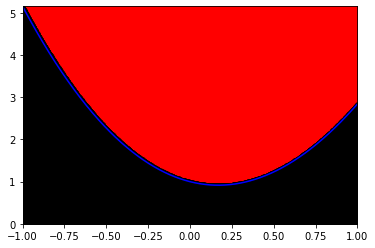

Area con Montecarlo:  4.005422390310152
Area Con la integral:  4.0
El error:  -0.00542239031015157


In [29]:

import matplotlib.pyplot as plt
import numpy as np
import math
import random


#mi funcion
def funcion(x):
    return math.sin(x)+3*x**2-2*x+1

x_limite_min = -1.0
x_limite_max = 1.0
cant_pasos = int(1e6)
y_limite_min = 0
y_limite_max = 0
x_func = []
y_func = []
for i in range(cant_pasos):
    x = x_limite_min + (x_limite_max - x_limite_min) * float(i) / cant_pasos
    y = funcion(x)
    y_func.append(y)
    x_func.append(x)
    if y > y_limite_max: y_limite_max = y

aux_area = (x_limite_max - x_limite_min) * (y_limite_max - y_limite_min)
cont = 0
x_adentro=[]
y_adentro=[]
x_afuera=[]
y_afuera=[]
for j in range(cant_pasos):
    x = x_limite_min + (x_limite_max - x_limite_min) * random.random()
    y = y_limite_min + (y_limite_max - y_limite_min) * random.random()
    if y <= funcion(x):
        cont += 1
        x_adentro.append(x)
        y_adentro.append(y)
    else:
        x_afuera.append(x)
        y_afuera.append(y)

area_montecarlo = aux_area * (float(cont) / cant_pasos)


from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import math
import random

init_printing() 
x = Symbol('x')
integral=Integral((sin(x)+3*x**2-2*x+1), (x, -1, 1))
Eq(integral, integral.doit())
analitica=float(integral.doit())
error = analitica - area_montecarlo


xx = np.arange(x_limite_min,x_limite_max,(x_limite_max-x_limite_min)/1000)
yy=[]

for xi in xx:
    yy.append(funcion(xi))
plt.plot(x_afuera, y_afuera, color="red",linewidth=0, marker='.' )
plt.plot(x_adentro, y_adentro, color="black",linewidth=0, marker='.' )
#plt.plot(x_afuera, y_afuera, color="red",linewidth=0, marker='o' )
plt.plot(xx,yy,color="blue")


plt.ylim(y_limite_min, y_limite_max)
plt.xlim(x_limite_min, x_limite_max)
plt.grid(True) 
plt.show()


print("Area con Montecarlo: ", area_montecarlo)
print("Area Con la integral: ", analitica)
print("El error: ",error)

## 4.
Usando el siguiente código basado en el ejemplo de "Movie Renege" de Simpy (https://simpy.readthedocs.io/en/latest/examples/movie_renege.html), modifique el código para que cumpla las siguientes condiciones:

    - El máximo número de personas por película sea de 45
    - El tiempo de simulación sea de 105 minutos
    - Si quedan menos de 3 tiquetes despues de una compra de tiquete, la señal de agotado será activada 
    - Disminuya de 30 a 24 segundos el tiempo que discuten los asistentes al cine que estan en la fila cuando aparece el aviso de agotado.
    - Los asistentes al cine llegan en tiempos aleatorios e intentan comprar un numero aleatorio de tiquetes entre 1 a 8  

Ejecute la versión modifica y responda:

    a. ¿Cuántas personas abandonan la fila luego de que los tiquetes para la película "Bad Boys para siempre" estan agotados?
    b. ¿Cuánto tiempo paso desde la apertura del mostrador hasta que se agotaron los tiquetes para la película "Parásito"?
    c. ¿Cuál fue la primera película en agotarse?

In [32]:
"""
Movie renege example

Covers:

- Resources: Resource
- Condition events
- Shared events

Scenario:
  A movie theatre has one ticket counter selling tickets for three
  movies (next show only). When a movie is sold out, all people waiting
  to buy tickets for that movie renege (leave queue).

"""
import collections
import random

import simpy


RANDOM_SEED = 2020
TICKETS = 45  
SIM_TIME = 105 


def moviegoer(env, movie, num_tickets, theater):
    """A moviegoer tries to by a number of tickets (*num_tickets*) for
    a certain *movie* in a *theater*.

    If the movie becomes sold out, she leaves the theater. If she gets
    to the counter, she tries to buy a number of tickets. If not enough
    tickets are left, she argues with the teller and leaves.

    If at most one ticket is left after the moviegoer bought her
    tickets, the *sold out* event for this movie is triggered causing
    all remaining moviegoers to leave.

    """
    with theater.counter.request() as my_turn:
        # Wait until its our turn or until the movie is sold out
        result = yield my_turn | theater.sold_out[movie]

        # Check if it's our turn of if movie is sold out
        if my_turn not in result:
            theater.num_renegers[movie] += 1
            env.exit()

        # Check if enough tickets left.
        if theater.available[movie] < num_tickets:
            # Moviegoer leaves after some discussion
            yield env.timeout(0.4)
            env.exit()

        # Buy tickets
        theater.available[movie] -= num_tickets
        if theater.available[movie] < 3:
            # Trigger the "sold out" event for the movie
            theater.sold_out[movie].succeed()
            theater.when_sold_out[movie] = env.now
            theater.available[movie] = 0
        yield env.timeout(1)


def customer_arrivals(env, theater):
    """Create new *moviegoers* until the sim time reaches 120."""
    while True:
        yield env.timeout(random.expovariate(1 / 0.5))

        movie = random.choice(theater.movies)
        num_tickets = random.randint(1, 8)
        if theater.available[movie]:
            env.process(moviegoer(env, movie, num_tickets, theater))


Theater = collections.namedtuple('Theater', 'counter, movies, available, '
                                            'sold_out, when_sold_out, '
                                            'num_renegers')


# Setup and start the simulation
print('Abandono de pelicula')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Create movie theater
counter = simpy.Resource(env, capacity=1)
movies = ['Bad Boys para siempre', 'Parásito', 'Jumanji: El siguiente nivel']
available = {movie: TICKETS for movie in movies}
sold_out = {movie: env.event() for movie in movies}
when_sold_out = {movie: None for movie in movies}
num_renegers = {movie: 0 for movie in movies}
theater = Theater(counter, movies, available, sold_out, when_sold_out,
                  num_renegers)

# Start process and run
env.process(customer_arrivals(env, theater))
env.run(until=SIM_TIME)

# Analysis/results
for movie in movies:
    if theater.sold_out[movie]:
        print('La película "%s" se agotó %.1f minutos después de la apertura del '
              'mostrador.' % (movie, theater.when_sold_out[movie]))
        print('  Numero de gente dejando la fila cuando la pelicula esta agotada: %s' %
              theater.num_renegers[movie])

Abandono de pelicula
La película "Bad Boys para siempre" se agotó 34.1 minutos después de la apertura del mostrador.
  Numero de gente dejando la fila cuando la pelicula esta agotada: 5
La película "Parásito" se agotó 35.9 minutos después de la apertura del mostrador.
  Numero de gente dejando la fila cuando la pelicula esta agotada: 11
La película "Jumanji: El siguiente nivel" se agotó 31.3 minutos después de la apertura del mostrador.
  Numero de gente dejando la fila cuando la pelicula esta agotada: 4


### A). ¿Cuántas personas abandonan la fila luego de que los tiquetes para la película "Bad Boys para siempre" estan agotados?
la cantidad de personas que abadonan la fila despues de agotado los tickets es de 5.
### B). ¿Cuánto tiempo paso desde la apertura del mostrador hasta que se agotaron los tiquetes para la película "Parásito"?
pasaron 35.9 minutos para que se agotaran los tickets de la pelicula parasito
### C). ¿Cuál fue la primera película en agotarse?
la pelicula que mas rapido se agoto fue Jumanji.

## 5.  
Se tiene un sistema de línea de espera con un servidor y capacidad infinita (Modelo de Colas G/G/1) (Ver [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ), en el cual tanto los tiempos de llegada entre clientes, así como los tiempos de atención del servidor se comportan como  variables aleatorias generadas de distribuciones de probabilidad exponenciales, en donde en promedio llegan A clientes por minuto al sistema y el servidor atiende en promedio B clientes por minuto. La simulación inicia en el tiempo $t=0$ y se deja de permitir el ingreso de mas clientes en el sistema en el tiempo $T=100$.

Para analizar el sistema Ud. debe usar la implementación de acuerdo con el Modelo de Colas G/G/1 visto en clase (diapositivas 42 y 43 [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ). 

Para la generación de las variables aleatorias con distribución exponencial debe usar el método de la inversión para variables aleatorias continuas usando generadores congruenciales mixtos. _Ayuda: El método de inversión para variables aleatorias continuas debe usar la función inversa $F^{-1}(p)$ de la distribución de probabilidad acumulada de la distribución exponencial en donde el valor $p$ proviene del generador congruencial mixto_.

Para la generación de las variables aleatorias de los tiempos entre las llegadas de clientes (variable aleatoria $X$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = A$ a partir de un generador congruencial Turbo Pascal (i.e. $a = 134775813$, $c = 1$, $m=2^{32}$) y semilla $X_0 = 987654321$.

Para la generación de las variables aleatorias de los tiempos de atención del servidor (variable aleatoria $Y$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = B$ a partir de un generador congruencial Microsoft Visual Basic (i.e. $a = 1140671485$, $c = 12820163$, $m=2^{24}$) y semilla $X_0 = 123987456$.

Con su implementación para $A=3$ y $B=7$ por favor responda lo siguiente:

    a. Tiempo promedio de los clientes en el sistema.
    b. Tiempo promedio de los clientes en la cola.
    c. Tiempo transcurrido desde $T$ hasta que el último cliente abandona el sistema.
    d. Número máximo de clientes en el sistema durante la simulación.

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt

Xant1 = 2022020
Xant2 = 1234567890

M = 99999.0
T = 200.0
at = []
an = []
LLt = []
St = []

def gencongru1(): 
    global Xant1
    a = 1140671485
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    global Xant2
    a = 1140671485
    c = 12820163
    m = 2**24
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarX():
    vlambda = 3
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarY():
    vlambda = 7
    U = gencongru2()
    Y = -(math.log(1-U))/float(vlambda)
    return Y

def Llegada(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t=tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)
    
    NLL = NLL + 1
    LL.append(t)
    
    X = GenerarX()
    
    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y 
        Serv.append(Y)
        
def Servidor(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1
    
    St.append(t)
    at.append(t)
    an.append(n)
    
    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        Serv.append(Y) 
    
t = tsuc = NLL = NS = n = 0

at.append(t)
an.append(n)

TSuc = {"tLL":M, "tS":M}

LL = []
S = []
Serv = []
LL.append(0.0)
S.append(0.0)
Serv.append(0.0)

X = GenerarX()

if X > T:
    Tp = t_med_sistema = t_med_cola = 0.0
    exit
else:
    Llegada(X)
    while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
        if TSuc['tLL'] < TSuc['tS']:
            tsuc = TSuc['tLL']
            TSuc['tLL'] = M
            Llegada(tsuc)
            
        if TSuc['tS'] < TSuc['tLL']:
            tsuc = TSuc['tS']
            TSuc['tS'] = M
            Servidor(tsuc)

    Tp = max(0,t-T)
    acumulo1 = acumulo2 = 0.0
    ind = 0
    
    while ind < NLL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1/NLL
    t_med_cola = acumulo2/NLL

    exit

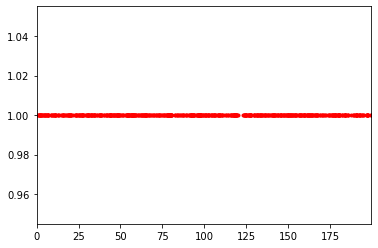

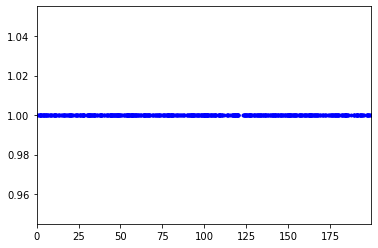

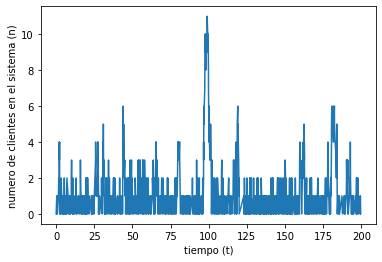

Tiempo medio de los clientes en el sistema:  0.30708271110541313
Tiempo medio de los clientes en la cola:  0.15529372537569863
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  0
Número máximo de clientes en el sistema:  11
Total de clientes que pasaron por el sistema:  576


In [31]:
at = np.array(at)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema: ",t_med_sistema)
print("Tiempo medio de los clientes en la cola: ",t_med_cola)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema: ",max(an))
print("Total de clientes que pasaron por el sistema: ",NLL)